# Ficha #05 - Criação automática das máscaras do dataset DRIVE

**Objectivo**: Neste trabalho usando as técnicas que julgar mais adequadas deve gerar automaticamente as máscaras do conjunto de imagens do DRIVE. A máscara permite extrair a zona central de interesse da image de fundo de olho. Na validação do seu trabalho deve sobrepor vários perfis de intensidade da máscara e da imagem de fundo de olho na direcção horizontal como na vertical.

In [5]:
%pylab inline
import sys
sys.path.append('/usr/lib/python3.6/site-packages')
import cv2
import scipy.ndimage
import numpy as np

from scipy import signal
from skimage.filters import threshold_otsu
from scipy import ndimage
from skimage.segmentation import clear_border
from skimage import data
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


Populating the interactive namespace from numpy and matplotlib


In [6]:
def grad(img):
    kernel = np.matrix('0 1 0;1 -4 1; 0 1 0')
    grad = signal.correlate2d(img, kernel, boundary='symm', mode='same')
    return grad

In [7]:
def scaleToInts(img):
    for i in range(0,len(img)):
        for j in range(0,len(img[0])):
            if(img[i][j]==1):
                img[i][j]=255
    return img

In [18]:
def makeMasc(path,imgName,finalImgName):
    img = cv2.imread(path+imgName,0)
    finalImg = imread(path+finalImgName,0)
    
    gray()
    
    gradImg = grad(img)
    
    global_thresh = threshold_otsu(img)
    otsu = img > global_thresh

    _,ax=subplots(1,4,figsize=(18,6))

    ax[0].set_title('Imagem Original')
    ax[0].imshow(img)

    ax[1].set_title('Gradiente da Imagem')
    ax[1].imshow(gradImg)

    ax[2].set_title('ThresHold de Otsu')
    ax[2].imshow(otsu, cmap=plt.cm.gray)

    ax[3].set_title('Histograma do Gradiente')
    plt.hist(gradImg.ravel(),256)


    gradOt = grad(otsu)
    
    global_thresh = threshold_otsu(gradOt)
    otsu2 = gradOt > global_thresh

    a=np.ones((2,2), dtype=np.int) 
    dilating = ndimage.binary_dilation(gradOt, a)
    
    floodfill = dilating.copy()
    cleared = clear_border(floodfill)
    label_image = label(cleared)
    filled = ndimage.binary_fill_holes(label_image).astype(int)

    _,bx=subplots(1,4,figsize=(18,6))
    
    bx[0].set_title('Gradiente aplicado a Otsu')
    bx[0].imshow(gradOt)
    
    bx[1].set_title('Margem isolada')
    bx[1].imshow(otsu2)

    bx[2].set_title('Dilatação da Margem')
    bx[2].imshow(dilating)

    bx[3].set_title('Margem Exterior Preenchida')
    bx[3].imshow(filled)


    lastScaled = scaleToInts(filled)

    _,cx=subplots(1,3,figsize=(18,6))

    cx[0].set_title('Produto Final')
    cx[0].imshow(filled)

    cx[1].set_title('Teste de Plot Horizontal')
    cx[1].plot(lastScaled[:,300])
    cx[1].plot(img[:,300])

    cx[2].set_title('Teste de Plot Vertical')
    cx[2].plot(lastScaled[300,:])
    cx[2].plot(img[300,:])



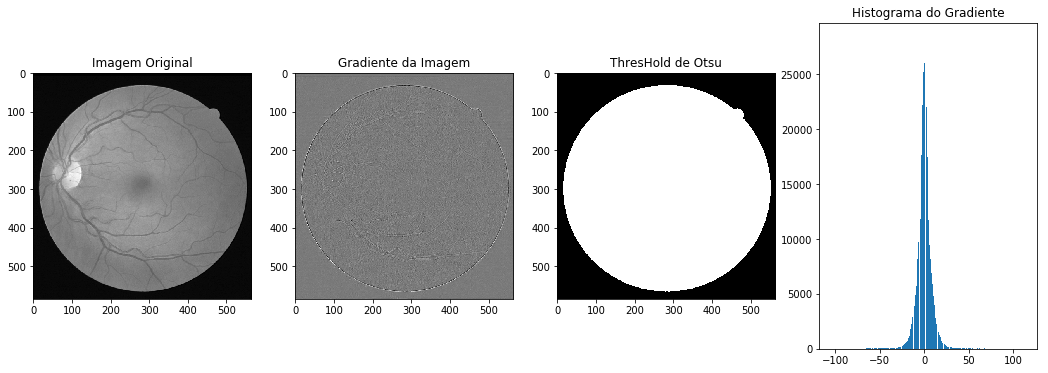

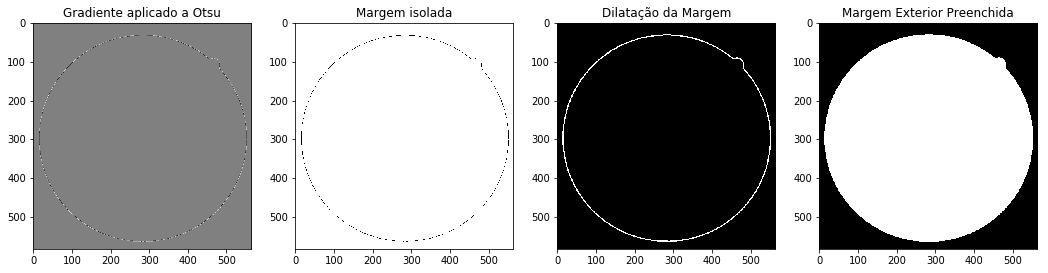

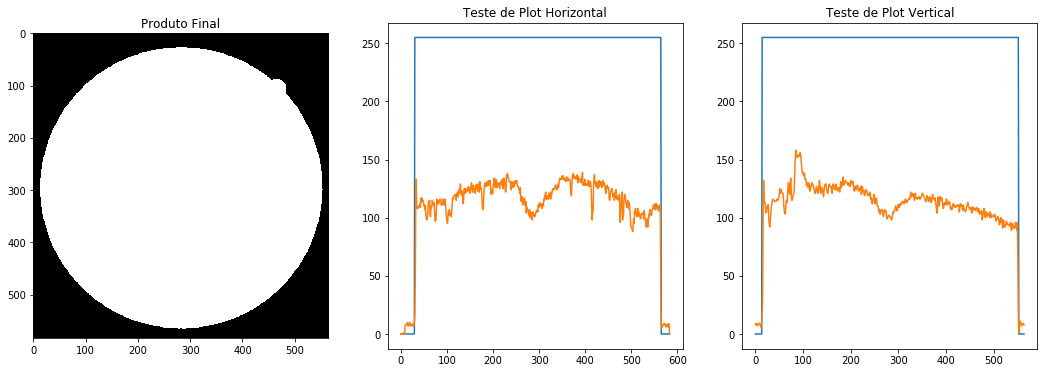

In [19]:
path = "DRIVE/test/"
makeMasc(path,"images/01_test.tif","mask/01_test_mask.gif")
    